# 1장. 소개

*아래 링크를 통해 이 노트북을 주피터 노트북 뷰어(nbviewer.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.*

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.org/github/rickiepark/intro_ml_with_python_2nd_revised/blob/main/01-introduction.ipynb"><img src="https://jupyter.org/assets/share.png" width="60" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/intro_ml_with_python_2nd_revised/blob/main/01-introduction.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

In [1]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    # 사이킷런 최신 버전을 설치합니다.
    !pip install -q --upgrade scikit-learn
    # mglearn을 다운받고 압축을 풉니다.
    !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
    !tar -xzf mglearn.tar.gz

In [2]:
import sklearn
from preamble import *

## 1.1 왜 머신 러닝인가?
### 1.1.1 머신 러닝으로 풀 수 있는 문제
### 1.1.2 문제와 데이터를 이해하기
## 1.2 왜 파이썬인가?
## 1.3 scikit-learn
### 1.3.1 Scikit-learn 설치
## 1.4 필수 라이브러리와 도구들
### 1.4.1 주피터 노트북
### 1.4.2 NumPy

In [3]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n", x)

x:
 [[1 2 3]
 [4 5 6]]


### 1.4.3 SciPy

In [4]:
from scipy import sparse

# 대각선 원소는 1이고 나머지는 0인 2차원 NumPy 배열을 만듭니다.
eye = np.eye(4)
print("NumPy 배열:\n", eye)

NumPy 배열:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [5]:
# NumPy 배열을 CSR 포맷의 SciPy 희박 행렬로 변환합니다.
# 0이 아닌 원소만 저장됩니다.
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy의 CSR 행렬:\n", sparse_matrix)


SciPy의 CSR 행렬:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [6]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO 표현:\n", eye_coo)

COO 표현:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


### 1.4.4 matplotlib

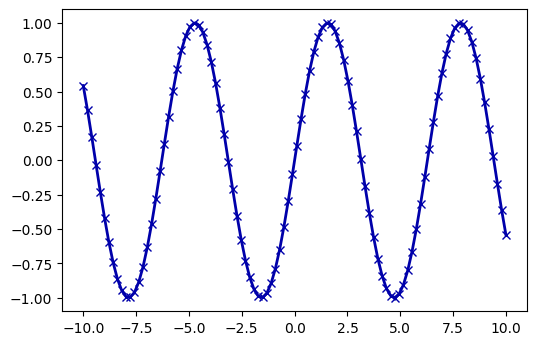

In [7]:
import matplotlib.pyplot as plt

# -10에서 10까지 100개의 간격으로 나뉘어진 배열을 생성합니다.
x = np.linspace(-10, 10, 100)
# 사인 함수를 사용하여 y 배열을 생성합니다.
y = np.sin(x)
# plot 함수는 한 배열의 값을 다른 배열에 대응해서 선 그래프를 그립니다.
plt.plot(x, y, marker="x")
plt.show() # 책에는 없음

### 1.4.5 pandas

In [8]:
import pandas as pd

# 회원 정보가 들어간 간단한 데이터셋을 생성합니다.
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# 주피터 노트북은 Dataframe을 미려하게 출력해줍니다.
data_pandas

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [9]:
# Age 열의 값이 30 이상인 모든 행을 선택합니다.
data_pandas[data_pandas.Age > 30]

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


### 1.4.6 mglearn

## 1.5 파이썬 2 vs. 파이썬 3
## 1.6 이 책에서 사용하는 소프트웨어 버전

In [10]:
import sys
print("Python 버전:", sys.version)

import pandas as pd
print("pandas 버전:", pd.__version__)

import matplotlib
print("matplotlib 버전:", matplotlib.__version__)

import numpy as np
print("NumPy 버전:", np.__version__)

import scipy as sp
print("SciPy 버전:", sp.__version__)

import IPython
print("IPython 버전:", IPython.__version__)

import sklearn
print("scikit-learn 버전:", sklearn.__version__)

Python 버전: 3.7.3 (default, Jan 22 2021, 20:04:44) 
[GCC 8.3.0]
pandas 버전: 1.3.5
matplotlib 버전: 3.5.1
NumPy 버전: 1.21.4
SciPy 버전: 1.7.3
IPython 버전: 7.30.1
scikit-learn 버전: 1.0.1


## 1.7 첫 번째 애플리케이션: 붓꽃의 품종 분류
### 1.7.1 데이터 적재

In [11]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [12]:
print("iris_dataset의 키:\n", iris_dataset.keys())

iris_dataset의 키:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [13]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [14]:
print("타깃의 이름:", iris_dataset['target_names'])

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [15]:
print("특성의 이름:\n", iris_dataset['feature_names'])

특성의 이름:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [16]:
print("data의 타입:", type(iris_dataset['data']))

data의 타입: <class 'numpy.ndarray'>


In [17]:
print("data의 크기:", iris_dataset['data'].shape)

data의 크기: (150, 4)


In [18]:
print("data의 처음 다섯 행:\n", iris_dataset['data'][:5])

data의 처음 다섯 행:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [19]:
print("target의 타입:", type(iris_dataset['target']))

target의 타입: <class 'numpy.ndarray'>


In [20]:
print("target의 크기:", iris_dataset['target'].shape)

target의 크기: (150,)


In [21]:
print("타깃:\n", iris_dataset['target'])

타깃:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 1.7.2 성과 측정: 훈련 데이터와 테스트 데이터

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [23]:
print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)

X_train 크기: (112, 4)
y_train 크기: (112,)


In [24]:
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

X_test 크기: (38, 4)
y_test 크기: (38,)


### 1.7.3 가장 먼저 할 일: 데이터 살펴보기

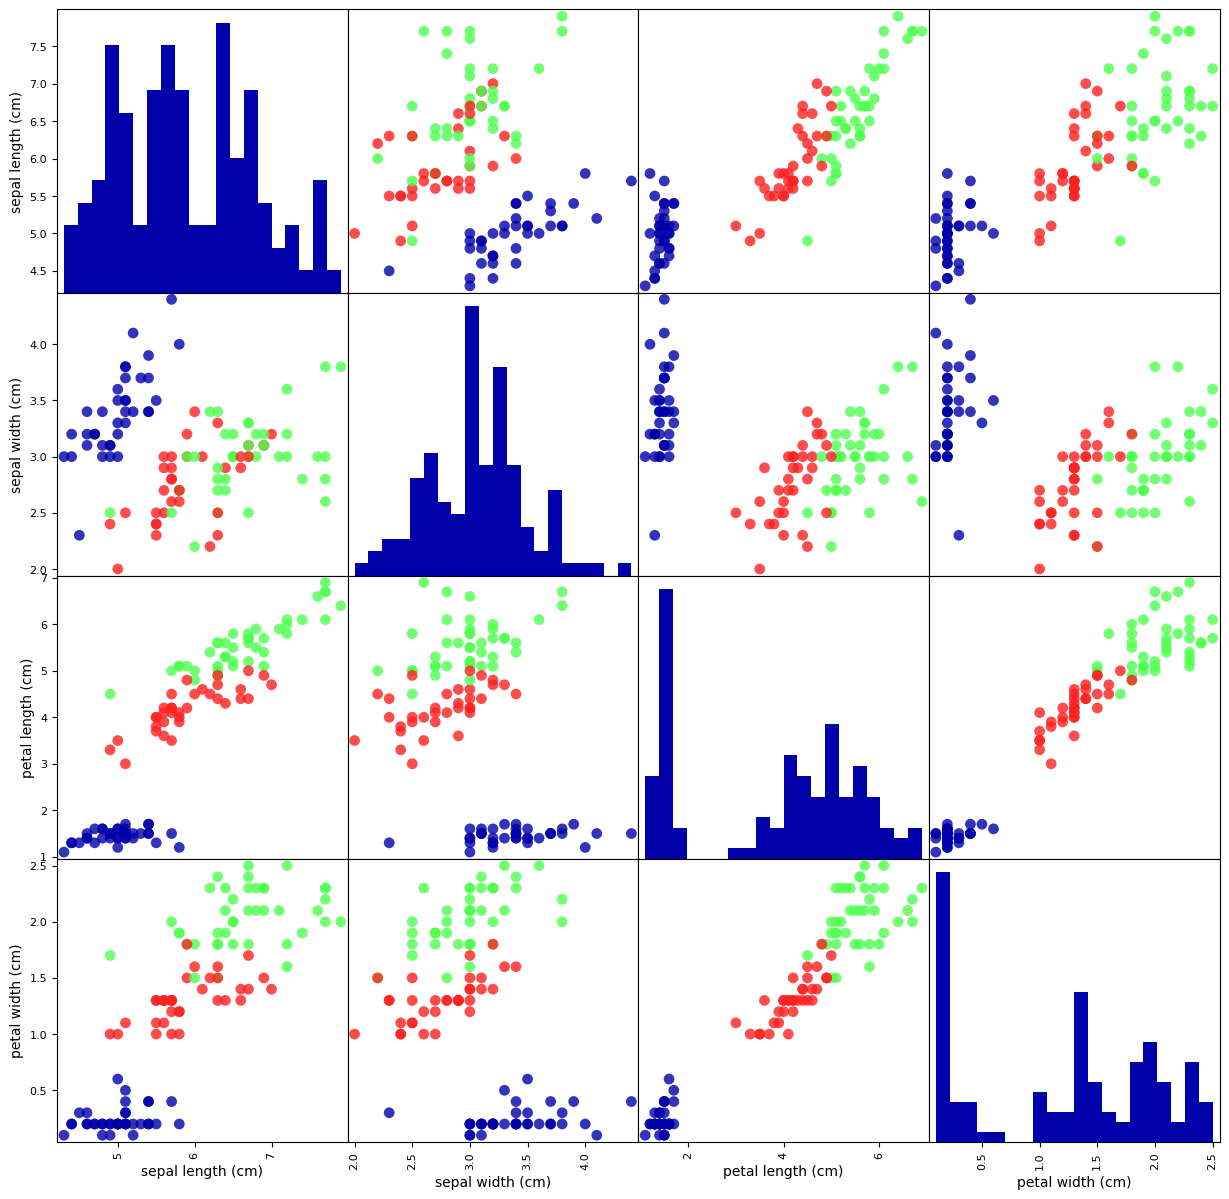

In [25]:
# X_train 데이터를 사용해서 데이터프레임을 만듭니다.
# 열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용합니다.
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듭니다.
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)
plt.show() # 책에는 없음

### 1.7.4 첫 번째 머신 러닝 모델: k-최근접 이웃 알고리즘

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### 1.7.5 예측하기

In [28]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [29]:
prediction = knn.predict(X_new)
print("예측:", prediction)
print("예측한 타깃의 이름:", 
       iris_dataset['target_names'][prediction])

예측: [0]
예측한 타깃의 이름: ['setosa']


### 1.7.6 모델 평가하기

In [30]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n", y_pred)

테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [31]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.97


In [32]:
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97


## 1.8 요약

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97
